In [2]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Neural Network

The `neural_network` function creates a model that learns to classify digits.

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels

Outputs: 
* `test_loss` is the loss after evaluating the testing dataset
* `test_acc` is the accuracy after evaluating the testing dataset
* `predictions` are the models predictions of the testing dataset


In [83]:
def neural_network(x_train, y_train, x_test, y_test):

    # Implement model
    num_layers = 5
    range_layers = 100
    num_out = np.random.randint(low=0, high=range_layers, size=num_layers)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    for i in range(num_layers):
        model.add(tf.keras.layers.Dense(units=num_out[i], activation="sigmoid"))
    model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
    
    # compile model, define optimizer
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
    # Fit and evaluate
    model.fit(x_train, y_train, batch_size=100, epochs=10)
    
    # Calculate predictions
    test_loss, test_acc = model.evaluate(x_test, y_test)
    predictions = model.predict(x_test)
    return test_loss, test_acc, predictions

## Run and Plot

In [33]:
# Other neural network code here:

# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_scale = scale_data(x_train)
x_test_scale = scale_data(x_test)

In [84]:
loss, acc, preds = neural_network(x_train_scale, y_train, x_test_scale, y_test);
# relu, 5 hidden layers, batch size 100, epochs 10

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 2.2361 - accuracy: 0.1777
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 2.2026 - accuracy: 0.2130
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 2.1552 - accuracy: 0.2794
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0071 - accuracy: 0.4629
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 1.9475 - accuracy: 0.5259
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 1.9149 - accuracy: 0.5508
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 1.9068 - accuracy: 0.5555
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 1.9028 - accuracy: 0.5588
Epoch 9/10
600/600 [==============================] - 3s 4ms/step - loss: 1.9001 - accuracy: 0.5610
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.8950 - accuracy: 0.5646

In [38]:
outputs = neural_network(x_train_scale, y_train, x_test_scale, y_test);
# sigmoid, 100 hidden layers, batch size 100, epochs 10
outputs[:2]

Epoch 1/10
600/600 [==============================] - 9s 15ms/step - loss: 2.3072 - accuracy: 0.1037
Epoch 2/10
600/600 [==============================] - 9s 14ms/step - loss: 2.3060 - accuracy: 0.1047
Epoch 3/10
600/600 [==============================] - 10s 16ms/step - loss: 2.3057 - accuracy: 0.1042
Epoch 4/10
600/600 [==============================] - 8s 14ms/step - loss: 2.3053 - accuracy: 0.1067
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 2.3049 - accuracy: 0.1067
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 2.3045 - accuracy: 0.1063
Epoch 7/10
600/600 [==============================] - 8s 14ms/step - loss: 2.3042 - accuracy: 0.1070
Epoch 8/10
600/600 [==============================] - 9s 14ms/step - loss: 2.3040 - accuracy: 0.1076
Epoch 9/10
600/600 [==============================] - 9s 15ms/step - loss: 2.3034 - accuracy: 0.1074
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3025 - accur

(2.3024981021881104, 0.0982000008225441)

In [40]:
outputs = neural_network(x_train_scale, y_train, x_test_scale, y_test);
# sigmoid, 10 hidden layers, batch size 100, epochs 10, always dim 10 in hidden layers (rather than uni(0,100))
outputs[:2]

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 2.3246 - accuracy: 0.1063
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 2.2925 - accuracy: 0.1311
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 2.0139 - accuracy: 0.1990
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 1.9525 - accuracy: 0.2048
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 1.9452 - accuracy: 0.2080
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 1.9393 - accuracy: 0.2097
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 1.9299 - accuracy: 0.2071
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 1.9193 - accuracy: 0.2109
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 1.8947 - accuracy: 0.2185
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.6688 - accuracy: 0.3364

(1.6687687635421753, 0.33640000224113464)

In [42]:
outputs = neural_network(x_train_scale, y_train, x_test_scale, y_test);
# sigmoid, 10 hidden layers, batch size 100, epochs 10, always dim 100 in hidden layers (rather than uni(0,100))
outputs[:2]

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3083 - accuracy: 0.1032
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 2.0646 - accuracy: 0.1701
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 1.8899 - accuracy: 0.2058
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 1.5858 - accuracy: 0.3584
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 1.0738 - accuracy: 0.5988
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.7706 - accuracy: 0.7025
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.6864 - accuracy: 0.7238
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.6166 - accuracy: 0.7755
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.4882 - accuracy: 0.8555
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.9096

(0.3862403333187103, 0.909600019454956)

In [73]:
loss, acc, preds = neural_network(x_train_scale, y_train, x_test_scale, y_test);
# sigmoid, 10 hidden layers, batch size 100, epochs 10, always dim 100 in hidden layers (rather than uni(0,100))

Epoch 1/10
600/600 [==============================] - 3s 6ms/step - loss: 2.3019 - accuracy: 0.1095
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3017 - accuracy: 0.1098
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3017 - accuracy: 0.1109
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 2.3017 - accuracy: 0.1108
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3016 - accuracy: 0.1113
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 2.3015 - accuracy: 0.1113
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 9/10
600/600 [==============================] - 4s 6ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3011 - accuracy: 0.1135

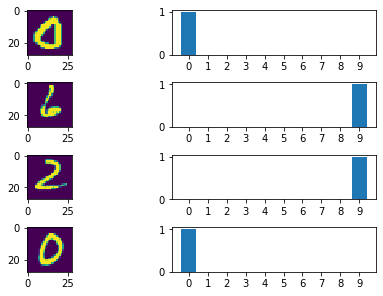

In [96]:
n = np.random.randint(low=0, high=10000, size=4)
figure, ax = plt.subplots(nrows=4, ncols=2, constrained_layout=True)
for fignum in range(4):
    position1 = ax[fignum, 0]
    position2 = ax[fignum, 1]
    position1.imshow(x_test[n[fignum]])
    position2.bar(range(10), preds[n[fignum]], tick_label=range(10))
plt.show()

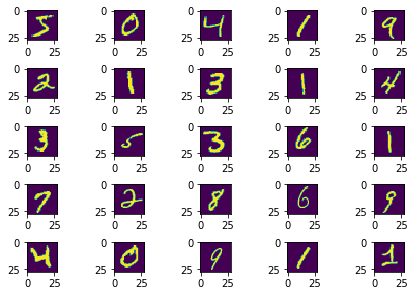

In [90]:
x_train_sample = x_train[:25]
figure, ax = plt.subplots(nrows=5, ncols=5, constrained_layout=True)
for figure in range(len(x_train_sample)):
    position = ax[figure // 5, figure % 5]
    position.imshow(x_train_sample[figure])
plt.show()